## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mode
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Exploration

Check if the data types are as expected

In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Check summary statistics

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Check for Outliers

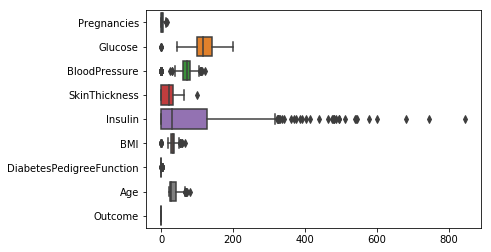

In [6]:
fig, ax = plt.subplots()
sns.boxplot(data=data, orient='h')
plt.show()

Dealing with outliers

In [7]:
q75, q25 = np.percentile(data['Insulin'], [75,25])
iqr = q75 - q25
whisker = q75 + (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

Inter quatile range:  127.25
Whisker            :  318.125


In [8]:
data['Insulin'] = data['Insulin'].clip(upper=whisker)

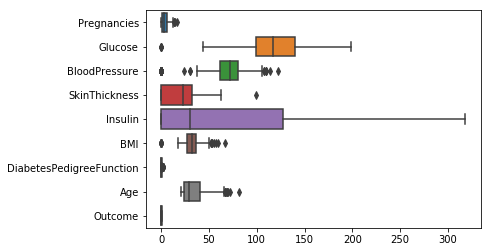

In [9]:
fig, ax = plt.subplots()
sns.boxplot(data=data, orient='h')
plt.show()

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Checking missing values

In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Scaling

In [12]:
vector = np.random.chisquare(1,500)
print('mean:  ',np.mean(vector))
print('std:    ',np.std(vector))
print('range: ',max(vector)-min(vector))

mean:   0.8863888451104946
std:     1.2794876849137369
range:  9.469007235052189


#### Min-max scaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
range_scaler = MinMaxScaler()
range_scaler.fit(vector.reshape(-1,1))
range_scaled_vector = range_scaler.transform(vector.reshape(-1,1))

In [14]:
print('mean:  ',np.mean(range_scaled_vector))
print('std:   ',np.std(range_scaled_vector))
print('range: ',max(range_scaled_vector)-min(range_scaled_vector))

mean:   0.09360856442938822
std:    0.13512374139681232
range:  [1.]


#### Standardization

In [15]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(vector.reshape(-1,1))
std_scaled_vector = standardizer.transform(vector.reshape(-1,1))
print('mean:    ',int(np.mean(std_scaled_vector)))
print('std:     ',int(np.std(std_scaled_vector)))
print('range:   ',max(std_scaled_vector)-min(std_scaled_vector))

mean:     0
std:      1
range:    [7.40062397]


#### Reshape

In [16]:
vector.shape

(500,)

In [17]:
row_vector = vector.reshape(-1,1)
row_vector.shape

(500, 1)

In [18]:
col_vector = vector.reshape(1,-1)
col_vector.shape

(1, 500)

In [19]:
matrix = vector.reshape(10,50)
matrix.shape

(10, 50)